**Sono abbastanza soddisfatto del risultato.**

Resta da dimostrare che questa è effettivamente la distribuzione congiunta che da il trasporto ottimale.

In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyval
from math import floor

Definisco `f` e `g` che sono due polinomi di grado `m-1` con coefficenti casuali nell'intervallo `[-1, 1[`. In verità sono calcolati solo in `N` punti equidistribuiti su `[0, 1[`. Quindi, a mio dispetto, sono degli array di dimensione `N`.
Vedasi il grafico sottostante.

In [2]:
# I polinomi usati per generare la densità di probabilità hanno grado m-1
# quindi n coefficenti.
m = 12

# N è il numero di samples
N = 80
x = np.linspace(0, 1, N, endpoint=False)

# Coefficienti dei polinomi generati casualmente in [-1, 0[
rg = np.random.default_rng(randint(0, 100000))
f_coefficients = 2*rg.random(m)-1
g_coefficients = 2*rg.random(m)-1

# Calcolo del valore dei polinomi
f = polyval(x, f_coefficients)
g = polyval(x, g_coefficients)

# Definizioni alternative di f, per giocare
# f = rg.random(N)
# f = np.linspace(1,0,N, endpoint=False)
# f = np.linspace(0,1,N, endpoint=False)
# f = np.ones(N)
# f = np.zeros(N); f[0] = 1; f[1] = 1; f[2] = 1;
# f = np.sin(8*x)

# Definizioni alternative di g, per giocare
# g = rg.random(N)
# g = np.linspace(1,0,N, endpoint=False)
# g = np.linspace(0,1,N, endpoint=False)
# g = np.ones(N)
# g = np.zeros(N); g[-3] = 1; g[-2] = 1; g[-1] = 1;
g = np.sin(8*x)

# Se il minimo della funzione è negativo, la trasliamo verso l'alto.
# Non esistono densità di probabilità negative.
f -= min(min(f), 0) 
g -= min(min(g), 0)

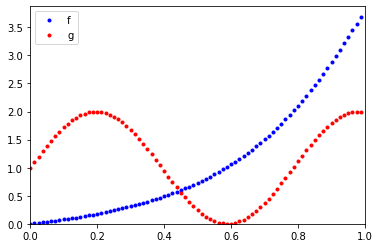

In [3]:
plt.xlim(0,1)
plt.ylim(0,max(max(f), max(g))*1.05)
plt.plot(x, f, 'b.', label="f")
plt.step(x, g, 'r.', label="g")
plt.legend()
plt.show()

> Calcoliamo l'integrale di questi polinomi con la regola del trapezio. Sì, proprio [quello degli acrobati](https://en.wikipedia.org/wiki/Trapezoidal_rule).

Poi ho cambiato perché quella integrazione non andava d'accordo con quel che succede dopo, tutto uno spostare di granelli di polvere. E io devo sapere esattamente quanti granelli di polvere ci sono. Faccio notare però che i due integrali sono molto simili, differiscono per un inezia.

In [4]:
print(f"L'integrale con il trapezio di f è {np.trapz(f, x):.3} mentre l'integrale del muratore è {sum(f)/N:.3}.")
print(f"La differenza è {abs(np.trapz(f, x) - sum(f)/N):.3}, invece il dx è {1/N:.3}.")
print("\n")
print(f"L'integrale con il trapezio di g è {np.trapz(g, x):.3} mentre l'integrale del muratore è {sum(g)/N:.3}.")
print(f"La differenza è {abs(np.trapz(g, x) - sum(g)/N):.3}, invece il dx è {1/N:.3}.")

L'integrale con il trapezio di f è 1.07 mentre l'integrale del muratore è 1.09.
La differenza è 0.0231, invece il dx è 0.0125.


L'integrale con il trapezio di g è 1.12 mentre l'integrale del muratore è 1.14.
La differenza è 0.0187, invece il dx è 0.0125.


Uso questo integrale per normalizzare i polinomi `f` e `g` in modo da poterli pensare come densità di probabilità.
Vedasi il grafico sottostante per confrontare funzioni originarie e loro normalizzate.

In [5]:
f_weight = sum(f)/N
g_weight = sum(g)/N
                                          
fnorm = f / f_weight
gnorm = g / g_weight

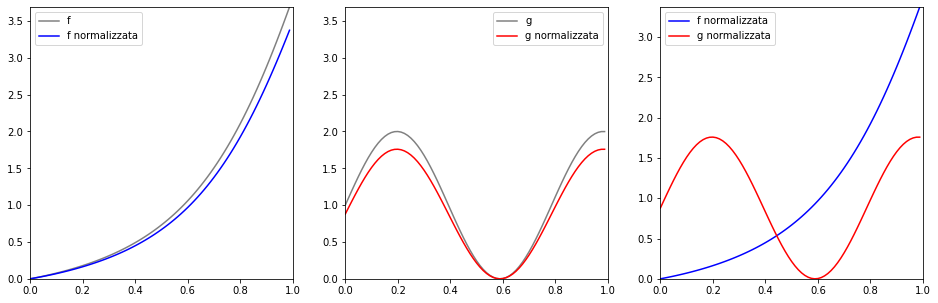

In [6]:
fig, axs = plt.subplots(1,3,figsize=(16,5))

top = max(max(f), max(fnorm), max(g), max(gnorm))
# plt.subplot(1,3,1,figsize=(15,15))
ax0 = axs[0]
ax0.set_xlim(0,1)
ax0.set_ylim(0,top)
ax0.plot(x, f, 'grey', label='f')
ax0.plot(x, fnorm, 'blue', label="f normalizzata")
ax0.legend()

# plt.subplot(1,3,2)
ax1 = axs[1]
ax1.set_xlim(0,1)
ax1.set_ylim(0,top)
ax1.plot(x, g, 'grey', label="g")
ax1.plot(x, gnorm, 'red', label="g normalizzata")
ax1.legend()

top = max(max(fnorm), max(gnorm))
# plt.subplot(1,3,3)
ax2 = axs[2]
ax2.set_xlim(0,1)
ax2.set_ylim(0,top)
ax2.plot(x, fnorm, 'blue', label="f normalizzata")
ax2.plot(x, gnorm, 'red', label="g normalizzata")

plt.legend()
plt.show()

Io interpreto ogni valore di `fnorm` come una "densità di probabilità" in approssimazione finita
.
Il vettore $\mathbf{x}$ è in verità la successione finita $$\{ x_n \}_{0 \leq n < N} = \left\{ \frac{n}{N} \right\}_{0 \leq n < N}$$.
C'è una variabile casuale $\mathcal{F}$ distribuita su $[0, 1[$ e $$\mathrm{fnorm}(x_i) = N \cdot \mathbb{P}\big( \mathcal F \in [x_n, x_{n+1}[ \big)$$

Ingenuamente, per $N \to \infty$ abbiamo che `fnorm` è una densità di probabilità.

In [7]:
# Questa funzione è servita durante lo sviluppo per capire che stava facendo l'algoritmo.
# Prepariamo una funzione per rappresentare la matrice accanto a i valori di `fnorm` (in orizzontale) e `gnorm` (in verticale).
# 
# np.set_printoptions(formatter={'float': lambda x: f"{x:0.2f}"}, edgeitems=3, threshold=6)
# 
# def pprint(matrix):
#     str(fnorm)[1:-1]
#     print('', str(fnorm)[1:-1] )
#     dots_break = False
#     for i in range(N):
#         if (i < 3 or i >= N-3):
#             print(str(matrix[i]) + f" {gnorm[i]:0.2f}")
#         else:
#             if dots_break:
#                 pass
#             else:
#                 print("... ...")
#                 dots_break = True

Prepariamo una matrice `(N, N)` che conterrà i valori della distribuzione congiunta.

Nella distribuzione congiunta ogni riga deve sommare al valore corrispondente di `gnorm` e ogni colonna deve sommare al valore corrispondente di `fnorm`.

Questo era un ragionamento precedente che usava due cicli for uno dentro l'altro.
> Partendo dalla prima riga riempiamo le caselle (scusa Pino) da sinistra verso destra, scendendo poi alla riga successiva. Ci sono due regole:
>  - ogni casella `joint[i][j]`, sommata a tutte quelle più a sinistra, non può superare `gnorm[i]`
>  - ogni casella `joint[i][j]`, sommata a tutte quelle più in alto, non può superare `fnorm[i]`

Poi ho pensato ad un altro ragionamento che gira con un solo ciclo for.
 - `fav` è, ad ogni iterazione, quanta *dirt* resta disponibile da `fnorm`
 - se `gnorm[i]` è molto grande, c'è bisogno di usare molti `fav[j]` e svuotarli
 - il cumulativo di `fav` (traslato a dx di 1) mi dice per ogni `joint[i][j]` quanta *dirt* avrei già potuto depositare in quella riga a patto di usare tutto quello che c'è in `fav`
 - `gnorm[i] - cumsum(fav)` è un vettore che dice quanto vorrebbe ancora `gnorm` per ogni posto `j` della riga, visto che ad ogni posto `j` io aggiungo la *dirt* di `fav[j]` e quindi `gnorm[i]` ha sempre meno fame
 - limito quel vettore a un minimo di `0` perché se è negativo vuol dire che `gnorm[i]` era già stato completamente sfamato
 - limito quel vettore a un massimo di `fav[j]` perché più di quel tanto il vettore `fnorm` non può più dare
 - tolgo da `fav` tutta la *dirt* che ho distribuito.

In [26]:
joint = np.zeros((N, N))  # Matrice vuota
fav = fnorm.copy()  # Copia di fnorm da cui si storneranno i valori già assegnati alla matrice


for i in range(N):
    # Stiamo scrivendo la joint[i], la i-esima riga della matrice
    # gnorm[i] è il totale che vogliamo ottenere, la somma di tutti i pesi che distribuiamo
    total = gnorm[i]
    
    # Il cumulativo di fav, traslato a destra di un posto
    # Se stiamo decidendo cosa scrivere in joint[i][j]
    # allora all_in[j] è quanto *sarebbe* già stato trasferito
    # nell'ipotesi di dare tutto quello che è disponibile
    all_in = np.insert(np.cumsum(fav), 0, 0)[:-1]
    
    # Al numero singolo total si sottrae il vettore all_in
    # Se hunger[j] è positivo allora è la quantità di _dirt_ che ancora bisogna trasferire per saziare gnorm[i]
    # Se hunger[j] è negativo significa che andando "all in" avremmo già trasferito troppo peso da fav in questa riga.
    hunger = total - all_in
    
    # Si limita hunger ai valori sensati
    # Il minimo è 0, perché non bisogna trasferire più del necessario.
    # Il massimo è fav (vettore) perché non si può trasferire più di quanto è disponibile nella colonna.
    line = np.clip(hunger, 0 , fav)
    
    joint[i] = line
    
    # Tutte le operazioni precedenti si possono svolgere in una linea
    # joint[i] = np.clip(gnorm[i] - np.insert(np.cumsum(fav), 0, 0)[:-1], 0, fav)
    
    # Si toglie dal peso disponibile quanto è stato appena trasferito
    fav -= joint[i]

Il grafico mostra meglio dove stanno i pesi. Quando le funzioni sono simili la matrice assomiglia molto alla diagonale. Quando le funzioni sono molto diverse è più spostata.

Però l'algoritmo fa il possibile (queste sono le mie intenzioni) per tenere la matrice il più possibile adesa alla diagonale.

Questo perché i punti lontani dalla diagonale significano un trasporto lungo e costoso, come trasportare il peso si `fnorm[49]` fino a `gnorm[1]`. Non ha senso, è meglio se il peso di `fnorm[49]` cerca di stare il più possibile vicino a `gnorm[49]` (che sarebbe a costo 0).

[[0.00 0.01 0.02 0.02 0.03 0.04 ... 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.00 0.00]
 ...
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.58 1.09 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 1.70 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.36 1.37 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 1.75 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.14 1.62]
 [0.00 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.00 0.00 0.00 0.00 1.76]]


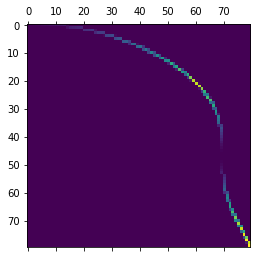

In [27]:
np.set_printoptions(formatter={'float': lambda x: f"{x:.2f}"}, edgeitems=6)
print(joint)

plt.matshow(joint)
plt.show()

Per controllare che l'algoritmo abbia funzionato bene, che almeno sia una distribuzione congiunta di probabilità, mettiamo a grafico le due distribuzioni marginali con le sommatorie lungo colonne e righe rispettivamente. I due grafici dovrebbero essere sovrapposti.

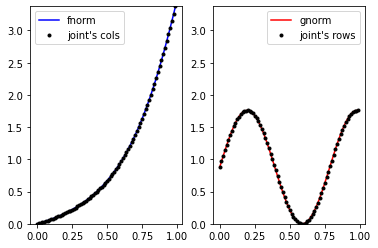

In [10]:
top = max(max(fnorm), max(gnorm))
plt.subplot(1,2,1)
plt.ylim(0, top)
plt.plot(x,fnorm, 'b-', label="fnorm")
plt.plot(x,np.sum(joint, axis=0), 'k.', label="joint's cols")
plt.legend()

plt.subplot(1,2,2)
plt.ylim(0, top)
plt.plot(x,gnorm, 'r-', label="gnorm")
plt.plot(x,np.sum(joint, axis=1), 'k.', label="joint's rows")
plt.legend()
plt.show()

## Quello che segue è sbagliato

In [32]:
sum(sum(joint))

79.99999999999999

In [11]:
np.set_printoptions(formatter={'float': lambda x: f"{x:.2f}"}, threshold=12, edgeitems=6)

In [12]:
def intermediate(joint_distribution, t):
    r = np.zeros(N)
    for i in range(N):  # row index is the final index of the transition
        for j in range(N):  # column index is the starting index of the transition
            k = (1-t) * j + t * i  # k is the floating point intermediate index
            left_k = max(min(floor(k), N-1),0)
            right_k = max(min(left_k +1, N-1), 0)
            
            weight = joint_distribution[i][j]  # how much dirt is to be moved from fnorm[j] to gnorm[i]
            left_weight = (right_k - k) * weight
            right_weight = weight - left_weight
            
            r[left_k] += left_weight
            r[right_k] += right_weight
    return r

def morphing_matrix(joint_distribution, steps: int = 61):
    list_of_distributions = []
    for t in np.linspace(0, 1, steps):
        list_of_distributions.append(intermediate(joint_distribution, t))
    plt.matshow(np.array(list_of_distributions))
    plt.show()
        

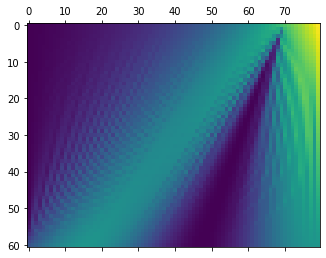

In [13]:
morphing_matrix(joint)

In [14]:
%matplotlib inline

In [15]:
from matplotlib import animation, rc
from IPython.display import HTML

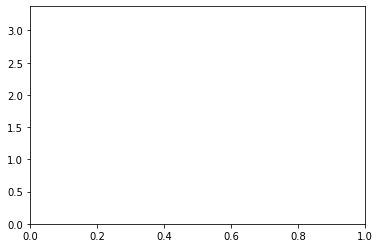

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

top = max(max(fnorm), max(gnorm))
ax.set_xlim(( 0, 1))
ax.set_ylim((0, top))

line, = ax.plot([], [], lw=2)

In [17]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [18]:
# joint = np.zeros((N,N))
# joint[2, 64] = 1
# joint[2, 5] = 1

# animation function. This is called sequentially
def animate(i):
    t = i/100
    y = sum( intermediate(joint, t-0.04+j*0.01)/9 for j in range(9) )
#     y = (ones @ joint)*(1-t) + (joint @ ones)*t
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [19]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

In [20]:
# HTML(anim.to_html5_video())

In [21]:
def wd(joint):
    tot = 0.0
    for i in range(N):
        for j in range(N):
            tot += abs(i-j)*joint[i][j]
    return tot

In [22]:
joint = independent_joint = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        independent_joint[i][j] = gnorm[i] * fnorm[j]

print(wd(independent_joint))

208733.09394586764


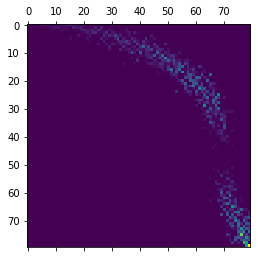

151309.6736774423


KeyboardInterrupt: 

In [23]:
from IPython.display import clear_output
def gzm(i,j,h,k):
    zmat = np.zeros((N,N))
    zmat[i][j] = 1
    zmat[i][k] = -1
    zmat[h][k] = 1
    zmat[h][j] = -1
    return zmat

from random import sample
def randzm():
    i, h = sorted(sample(range(N), 2))
    j, k = sorted(sample(range(N), 2))
    return gzm(i,j,h,k), i, j, h, k

for _y in range(100):
    for _t in range(6000):
        zm, i, j, h, k = randzm()
        c = min(joint[i][k], joint[h][j])
    #     print(f"Subtract {c}·Z_{i}{j}^{h}{k}")
        joint += c*zm
    clear_output(wait=True)
    
    plt.matshow(joint)
    plt.show()
    print(wd(joint))

In [ ]:
morphing_matrix(joint)

In [ ]:
print(wd(joint))

Sono fissati $f$ e $g$ in $\mathbb{R}^N$ tali che $\sum_n f_n = \sum_n g_n = 1$.

La matrici $A$ è *congiunta* se $ \mathbf 1 A = f$ e $ A \mathbf 1 = g$.

La matrice $A$ è *vacua* se $\mathbf 1 A = A \mathbf 1 = \mathbf 0$.

Le matrici vacue formano un sottospazio dell'insieme delle matrici.

Le matrici del tipo $^{ij}V_{hk}$, quelle che hanno i posti $ij$ e $hk$ uguali a $1$, i posti $ik$ e $hj$ uguali a $-1$ e tutto il resto $0$, sono un insieme di generatori delle matrici vacue. Le matrici del tipo $^{ii}V_{hk}$ formano una base per questo sottospazio vettoriale.

Se $A$ e $B$ sono matrici coniunte, allora $A - B$ è vacua. Supponiamo che esista la matrice $O$ che è una matrice congiunta con minima distanza di Wetterman. Allora una qualsiasi altra matrice congiunta $A$ è tale che $O = A + V$ per qualche $V$ vacua.

La distanza di Wermact è definita, nel caso discreto con l'ipotesi che $f$ e $g$ sono due distribuzioni di probabilità su $\{0, ..., N-1\}$,
$$ W_p(f, g) = \inf_{A\, \mathrm{congiunte}} \sum_i \sum_j d(i,j)^p \cdot a_{ij} $$
per qualche fissata funzione distanza $d$.

C'è quindi una matrice $\displaystyle D = \big(d(i,j)^p\big)_{ij}$ tale che
$$ W_p(f, g) = \inf_{A\, \mathrm{congiunte}} \mathbf {1 (D \circ A) 1} $$

Per qualsiasi matrice vacua $\mathbf V$ vale 
$$ \mathbf {1 (D \circ (A+V)) 1} = \mathbf {1 (D \circ A) 1} + \mathbf{ 1 (D \circ V) 1}$$

Quindi la matrice congiunta ottimale si trova a partire da qualsiasi altra $\mathbf A$ con una somma di $\lambda_{ihk} \cdot {^{ii}V_{jk}}$

In [33]:
D = np.fromfunction(lambda i, j: abs(i-j), (N, N))

In [37]:
sum(sum(D*joint))

1877.5975283631847